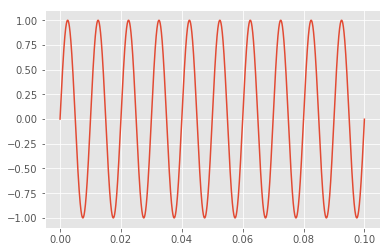

In [1]:
# sampling a sine wave programmatically
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 441000 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 100 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)

plt.plot(t_vec,y)
plt.show()

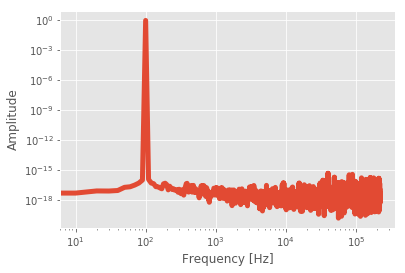

In [2]:
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=5)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

#**Generating Sound**

In [3]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.2).
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (181 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 131183 files and directories currently installed.)
Preparin

In [4]:
!sudo apt-get install python-pyaudio
!pip install pyAudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  python-pyaudio-doc
The following NEW packages will be installed:
  python-pyaudio
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 24.1 kB of archives.
After this operation, 109 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pyaudio amd64 0.2.11-1build2 [24.1 kB]
Fetched 24.1 kB in 0s (88.6 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package python

In [7]:
import math        #import needed modules
import pyaudio     #sudo apt-get install python-pyaudio

PyAudio = pyaudio.PyAudio     #initialize pyaudio

#See https://en.wikipedia.org/wiki/Bit_rate#Audio
BITRATE = 16000     #number of frames per second/frameset.      

FREQUENCY = 500     #Hz, waves per second, 261.63=C4-note.
LENGTH = 1     #seconds to play sound

if FREQUENCY > BITRATE:
    BITRATE = FREQUENCY+100

NUMBEROFFRAMES = int(BITRATE * LENGTH)
RESTFRAMES = NUMBEROFFRAMES % BITRATE
WAVEDATA = ''    

#generating wawes
for x in range(NUMBEROFFRAMES):
 WAVEDATA = WAVEDATA+chr(int(math.sin(x/((BITRATE/FREQUENCY)/math.pi))*127+128))    

for x in range(RESTFRAMES): 
 WAVEDATA = WAVEDATA+chr(128)

p = PyAudio()
stream = p.open(format = p.get_format_from_width(1), 
                channels = 1, 
                rate = BITRATE,
                output = True)

stream.write(WAVEDATA)
stream.stop_stream()
stream.close()
p.terminate()

OSError: ignored